# بسم الله الرحمن الرحيم

In [8]:
# Bezier Curve
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

## Linear Bézier curves

Given distinct points P0 and P1, a linear Bézier curve is simply a straight line between those two points. The curve is given by


and is equivalent to linear interpolation. 

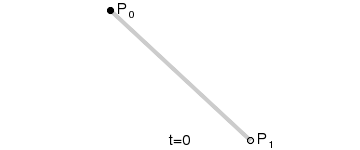

In [9]:
def linear_bezier(t, p0, p1):
    b_x = (1 - t) * p0.x + t * p1.x
    b_y = (1 - t) * p0.y + t * p1.y
    return Point(b_x, b_y)

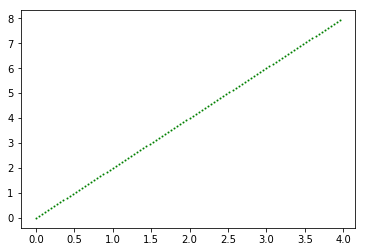

In [11]:
p0 = Point(0,0)
p1 = Point(4,8)

for t in np.arange(0.0, 1.0, 0.01):    
    b = linear_bezier(t, p0, p1)
    plt.plot(b.x, b.y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=1)
    

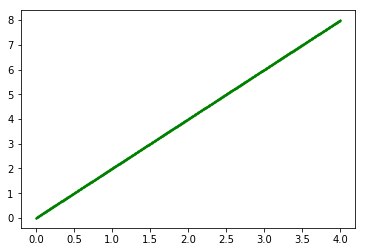

In [12]:
for x in np.arange(0.0, 1.0, 0.001):    
    b = linear_bezier(x, p0, p1)
    plt.plot(b.x, b.y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=1)

## Quadratic Bézier curves

A quadratic Bézier curve is the path traced by the function B(t), given points P0, P1, and P2,



which can be interpreted as the linear interpolant of corresponding points on the linear Bézier curves from P0 to P1 and from P1 to P2 respectively. Rearranging the preceding equation yields:



This can be written in a way that highlights the symmetry with respect to P1:



Which immediately gives the derivative of the Bézier curve with respect to t:



from which it can be concluded that the tangents to the curve at P0 and P2 intersect at P1. As t increases from 0 to 1, the curve departs from P0 in the direction of P1, then bends to arrive at P2 from the direction of P1.

The second derivative of the Bézier curve with respect to t is



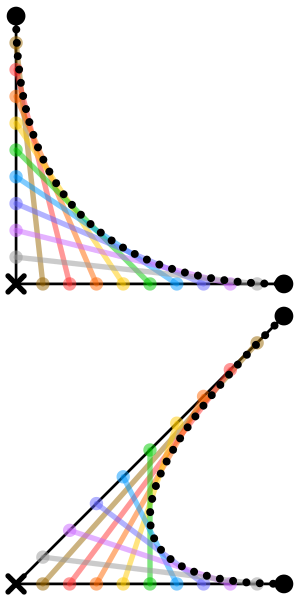

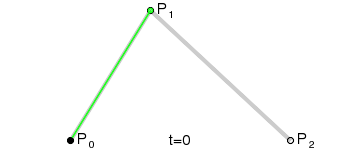

In [13]:
def quadratic_bezier(t, p0, p1, p2):
    b_x = p1.x + pow(1-t, 2) * (p0.x - p1.x) + pow(t, 2) * (p2.x - p1.x)
    b_y = p1.y + pow(1-t, 2) * (p0.y - p1.y) + pow(t, 2) * (p2.y - p1.y)
    return Point(b_x, b_y)

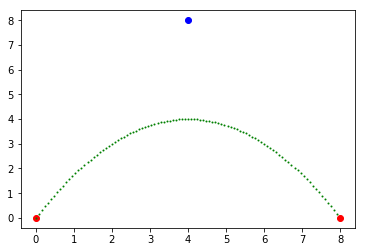

In [16]:
p0 = Point(0,0)
plt.plot(p0.x, p0.y, 'bo', color='red')

p1 = Point(4,8)
#p1 = Point(3, 7)
plt.plot(p1.x, p1.y, 'bo')

p2 = Point(8, 0)
plt.plot(p2.x, p2.y, 'bo', color='red')

for t in np.arange(0.0, 1.0, 0.01):    
    b = quadratic_bezier(t, p0, p1, p2)
    plt.plot(b.x, b.y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=1)

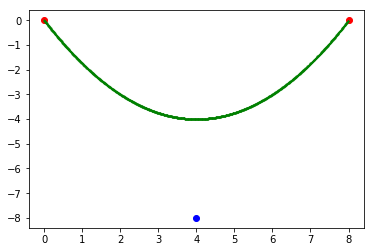

In [17]:
p0 = Point(0,0)
plt.plot(p0.x, p0.y, 'bo', color='red')

p1 = Point(4,-8)
#p1 = Point(3, 7)
plt.plot(p1.x, p1.y, 'bo')

p2 = Point(8, 0)
plt.plot(p2.x, p2.y, 'bo', color='red')

for x in np.arange(0.0, 1.0, 0.001):    
    b = quadratic_bezier(x, p0, p1, p2)
    plt.plot(b.x, b.y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=1)

## Cubic Bézier curves

Four points P0, P1, P2 and P3 in the plane or in higher-dimensional space define a cubic Bézier curve. The curve starts at P0 going toward P1 and arrives at P3 coming from the direction of P2. Usually, it will not pass through P1 or P2; these points are only there to provide directional information. The distance between P1 and P2 determines "how far" and "how fast" the curve moves towards P1 before turning towards P2.

Writing BPi,Pj,Pk(t) for the quadratic Bézier curve defined by points Pi, Pj, and Pk, the cubic Bézier curve can be defined as an affine combination of two quadratic Bézier curves:


    
The explicit form of the curve is:


For some choices of P1 and P2 the curve may intersect itself, or contain a cusp.

Any series of any 4 distinct points can be converted to a cubic Bézier curve that goes through all 4 points in order. Given the starting and ending point of some cubic Bézier curve, and the points along the curve corresponding to t = 1/3 and t = 2/3, the control points for the original Bézier curve can be recovered.

The derivative of the cubic Bézier curve with respect to t is


The second derivative of the Bézier curve with respect to t is



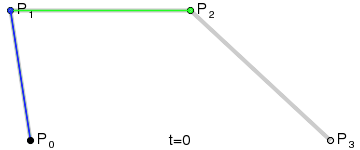

In [18]:
def cubic_bezier(t, p0, p1, p2, p3):
    x_b = pow(1 - t, 3) * p0.x + 3 * pow(1 - t, 2) * t * p1.x + 3 * (1-t) * pow(t, 2) * p2.x + pow(t,3) * p3.x
    y_b = pow(1 - t, 3) * p0.y + 3 * pow(1 - t, 2) * t * p1.y + 3 * (1-t) * pow(t, 2) * p2.y + pow(t,3) * p3.y
    return Point(x_b, y_b)

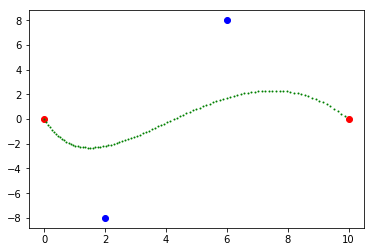

In [24]:
p0 = Point(0,0)
plt.plot(p0.x, p0.y, 'bo', color='red')

p1 = Point(2,-8)
plt.plot(p1.x, p1.y, 'bo')

#p2 = Point(4,-8)
p2 = Point(6, 8)
plt.plot(p2.x, p2.y, 'bo')

p3 = Point(10,0)
plt.plot(p3.x, p3.y, 'bo', color='red')

for t in np.arange(0.0, 1.0, 0.01):    
    b = cubic_bezier(t, p0, p1, p2, p3)
    plt.plot(b.x, b.y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=1)

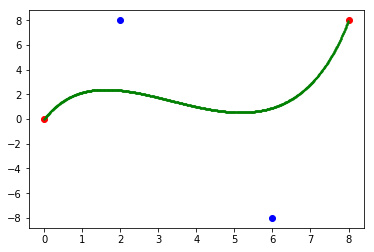

In [25]:
p0 = Point(0,0)
plt.plot(p0.x, p0.y, 'bo', color='red')

p1 = Point(2,8)
plt.plot(p1.x, p1.y, 'bo')

#p2 = Point(4,-8)
p2 = Point(6, -8)
plt.plot(p2.x, p2.y, 'bo')

p3 = Point(8,8)
plt.plot(p3.x, p3.y, 'bo', color='red')

for x in np.arange(0.0, 1.0, 0.001):    
    b = cubic_bezier(x, p0, p1, p2, p3)
    plt.plot(b.x, b.y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=1)

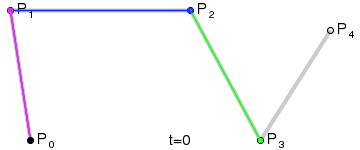

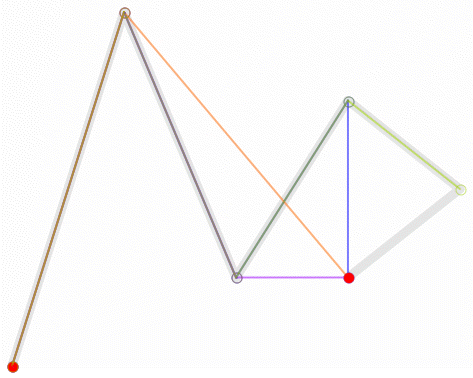